In [1]:
%load_ext autoreload
%autoreload 2
import hera_cal as hc
from hera_cal.abscal_funcs import *
from hera_cal.abscal import AbsCal
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import glob
%matplotlib notebook

In [2]:
data_files = ['/lustre/aoc/projects/hera/jsdillon/v2_H1C_IDR2/zen.2458115.24482.xx.HH.uvO']
model_files = sorted(glob.glob('/lustre/aoc/projects/hera/H1C_IDR2/abscal_models/zen.2458116.2*.xx.HH.uvXRS'))
calfits_infiles = ['/lustre/aoc/projects/hera/jsdillon/v2_H1C_IDR2/zen.2458115.24482.xx.HH.uv.omni.calfits']

# Standard Post-Omni Abscal

In [3]:
output_calfits_fname = 'standard_abscal.calfits'
gains, AC = hc.abscal.abscal_run(data_files, model_files, calfits_infiles=calfits_infiles, verbose=True, 
                                 overwrite=True, write_calfits=True, output_calfits_fname=output_calfits_fname, 
                                 return_gains=True, return_object=True, outdir='./', match_red_bls=False, tol=1.0, 
                                 reweight=False, rephase_model=True, all_antenna_gains=True, latitude=-30.72152, 
                                 max_dlst=0.005, history='',
                                 delay_slope_cal=True, 
                                 abs_amp_cal=True,
                                 TT_phs_cal=True, 
                                 gen_amp_cal=False,
                                 delay_cal=False, 
                                 avg_phs_cal=False, 
                                 gen_phs_cal=False)
standard_gains, standard_AC = gains, AC
if len(standard_gains) == 1: standard_gains = standard_gains[0]


loading model files
----------------------------------------

loading data files
----------------------------------------

loading /lustre/aoc/projects/hera/jsdillon/v2_H1C_IDR2/zen.2458115.24482.xx.HH.uvO
----------------------------------------
...configuring linsolve data for delay_lincal


divide by zero encountered in divide
invalid value encountered in divide
invalid value encountered in double_scalars


...running linsolve
...finished linsolve
...configuring linsolve data for abs_amp_logcal


divide by zero encountered in divide
invalid value encountered in divide
divide by zero encountered in log


...running linsolve
...finished linsolve
...configuring linsolve data for TT_phs_logcal


divide by zero encountered in divide
invalid value encountered in divide


...running linsolve
...finished linsolve


# No TT_phs_cal Post-Omni Abscal

In [4]:
output_calfits_fname = 'no_TT_abscal.calfits'
gains, AC = hc.abscal.abscal_run(data_files, model_files, calfits_infiles=calfits_infiles, verbose=True, 
                                 overwrite=True, write_calfits=True, output_calfits_fname=output_calfits_fname, 
                                 return_gains=True, return_object=True, outdir='./', match_red_bls=False, tol=1.0, 
                                 reweight=False, rephase_model=True, all_antenna_gains=True, latitude=-30.72152, 
                                 max_dlst=0.005, history='',
                                 delay_slope_cal=True, 
                                 abs_amp_cal=True,
                                 TT_phs_cal=False, 
                                 gen_amp_cal=False,
                                 delay_cal=False, 
                                 avg_phs_cal=False, 
                                 gen_phs_cal=False)
noTT_gains, noTT_AC = gains, AC
if len(noTT_gains) == 1: noTT_gains = noTT_gains[0]


loading model files
----------------------------------------

loading data files
----------------------------------------

loading /lustre/aoc/projects/hera/jsdillon/v2_H1C_IDR2/zen.2458115.24482.xx.HH.uvO
----------------------------------------
...configuring linsolve data for delay_lincal
...running linsolve
...finished linsolve
...configuring linsolve data for abs_amp_logcal
...running linsolve
...finished linsolve


# Load Data

In [48]:
hc.abscal.match_times('/lustre/aoc/projects/hera/jsdillon/v2_H1C_IDR2/zen.2458115.24482.xx.HH.uvO',
                      ['/lustre/aoc/projects/hera/H1C_IDR2/abscal_models/zen.2458116.23737.xx.HH.uvXRS', 
                       '/lustre/aoc/projects/hera/H1C_IDR2/abscal_models/zen.2458116.24482.xx.HH.uvXRS'])

array([ '/lustre/aoc/projects/hera/H1C_IDR2/abscal_models/zen.2458116.23737.xx.HH.uvXRS',
       '/lustre/aoc/projects/hera/H1C_IDR2/abscal_models/zen.2458116.24482.xx.HH.uvXRS'],
      dtype='|S78')

In [5]:
# Load omnicaled data
(omni_data, omni_data_flags, data_antpos, data_ants, data_freqs, data_times, data_lsts,
    data_pols) = io.load_vis(data_files[0], pop_autos=True, return_meta=True, pick_data_ants=False)

In [46]:
print sorted(model_files)
print data_files

['/lustre/aoc/projects/hera/H1C_IDR2/abscal_models/zen.2458116.20009.xx.HH.uvXRS', '/lustre/aoc/projects/hera/H1C_IDR2/abscal_models/zen.2458116.20754.xx.HH.uvXRS', '/lustre/aoc/projects/hera/H1C_IDR2/abscal_models/zen.2458116.21500.xx.HH.uvXRS', '/lustre/aoc/projects/hera/H1C_IDR2/abscal_models/zen.2458116.22245.xx.HH.uvXRS', '/lustre/aoc/projects/hera/H1C_IDR2/abscal_models/zen.2458116.22991.xx.HH.uvXRS', '/lustre/aoc/projects/hera/H1C_IDR2/abscal_models/zen.2458116.23737.xx.HH.uvXRS', '/lustre/aoc/projects/hera/H1C_IDR2/abscal_models/zen.2458116.24482.xx.HH.uvXRS', '/lustre/aoc/projects/hera/H1C_IDR2/abscal_models/zen.2458116.25228.xx.HH.uvXRS', '/lustre/aoc/projects/hera/H1C_IDR2/abscal_models/zen.2458116.25974.xx.HH.uvXRS', '/lustre/aoc/projects/hera/H1C_IDR2/abscal_models/zen.2458116.26719.xx.HH.uvXRS', '/lustre/aoc/projects/hera/H1C_IDR2/abscal_models/zen.2458116.27465.xx.HH.uvXRS', '/lustre/aoc/projects/hera/H1C_IDR2/abscal_models/zen.2458116.28211.xx.HH.uvXRS', '/lustre/aoc/pr

In [42]:
# Match model times
all_model_files = []
for df in data_files:
    all_model_files.extend(hc.abscal.match_times(df, model_files))
    
model_files_used = sorted(set(all_model_files))
print model_files_used

# Load model

(model, model_flags, model_antpos, model_ants, model_freqs, model_times, model_lsts,
    model_pols) = io.load_vis(model_files_used, pop_autos=True, return_meta=True)
antpos = model_antpos
model_lsts[model_lsts < model_lsts[0]] += 2*np.pi

['/lustre/aoc/projects/hera/H1C_IDR2/abscal_models/zen.2458116.23737.xx.HH.uvXRS', '/lustre/aoc/projects/hera/H1C_IDR2/abscal_models/zen.2458116.24482.xx.HH.uvXRS']


In [7]:
# Rephase model
bls = odict(map(lambda k: (k, data_antpos[k[0]] - data_antpos[k[1]]), omni_data.keys()))
new_model, new_flags = rephase_vis(model, model_lsts, data_lsts, bls, data_freqs, 
                                   flags=model_flags, latitude=-30.72152, max_dlst=0.005)

# set wgts to zero where model is flagged
wgts = DataContainer(odict(map(lambda k: (k, (~omni_data_flags[k]).astype(np.float)), omni_data_flags.keys())))
for k in new_flags.keys():
    wgts[k][new_flags[k]] *= 0


# Calibrate Data

In [8]:
standard_abs_data = DataContainer({bl: omni_data[bl] / standard_gains[bl[0],bl[2][0]] / 
                                   np.conj(standard_gains[bl[1],bl[2][1]]) for bl in omni_data.keys()})
noTT_abs_data = DataContainer({bl: omni_data[bl] / noTT_gains[bl[0],bl[2][0]] / 
                                   np.conj(noTT_gains[bl[1],bl[2][1]]) for bl in omni_data.keys()})

# Combine Redundant Baselines

In [9]:
flagged_bls = [bl for bl in omni_data_flags.keys() if np.all(omni_data_flags[bl])]
reds = hc.redcal.get_reds(data_antpos, pols=['xx'])
reds = [[bl for bl in red if bl not in flagged_bls] for red in reds]
reds = [red for red in reds if len(red) > 0]
blvecs = np.array([data_antpos[red[0][1]] - data_antpos[red[0][0]] for red in reds if red[0][2] == 'xx'])

In [10]:
def bl_avg_data(data, reds, pol):
    avg_data = []
    for red in reds:
        if red[0][2] == pol:
            avg_data.append(np.mean([data[bl] for bl in red], axis=0))
    return np.array(avg_data)

In [11]:
avg_standard_abs_data = bl_avg_data(standard_abs_data, reds, 'xx')
avg_noTT_abs_data = bl_avg_data(noTT_abs_data, reds, 'xx')
avg_model = bl_avg_data(new_model, reds, 'xx')

<IPython.core.display.Javascript object>


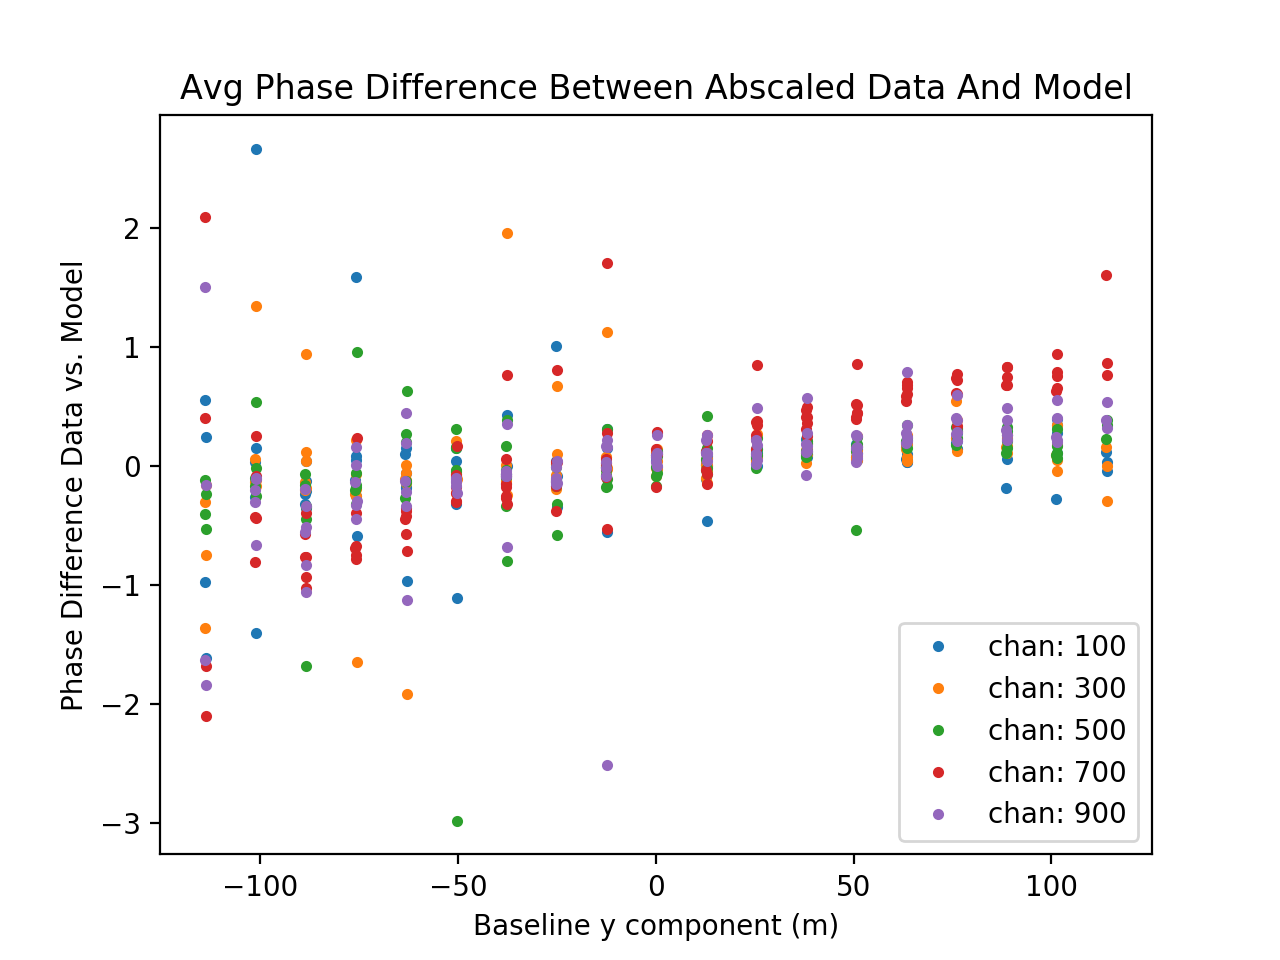

divide by zero encountered in divide


In [12]:
plt.figure()
for chan in [100,300,500,700,900]:
    plt.plot(blvecs[:,1], np.angle(np.mean(avg_standard_abs_data[:,:,chan] / avg_model[:,:,chan],axis=1)),
             '.', label='chan: '+str(chan))
plt.legend()
plt.xlabel('Baseline y component (m)')
plt.ylabel('Phase Difference Data vs. Model')
plt.title('Avg Phase Difference Between Abscaled Data And Model')


<IPython.core.display.Javascript object>


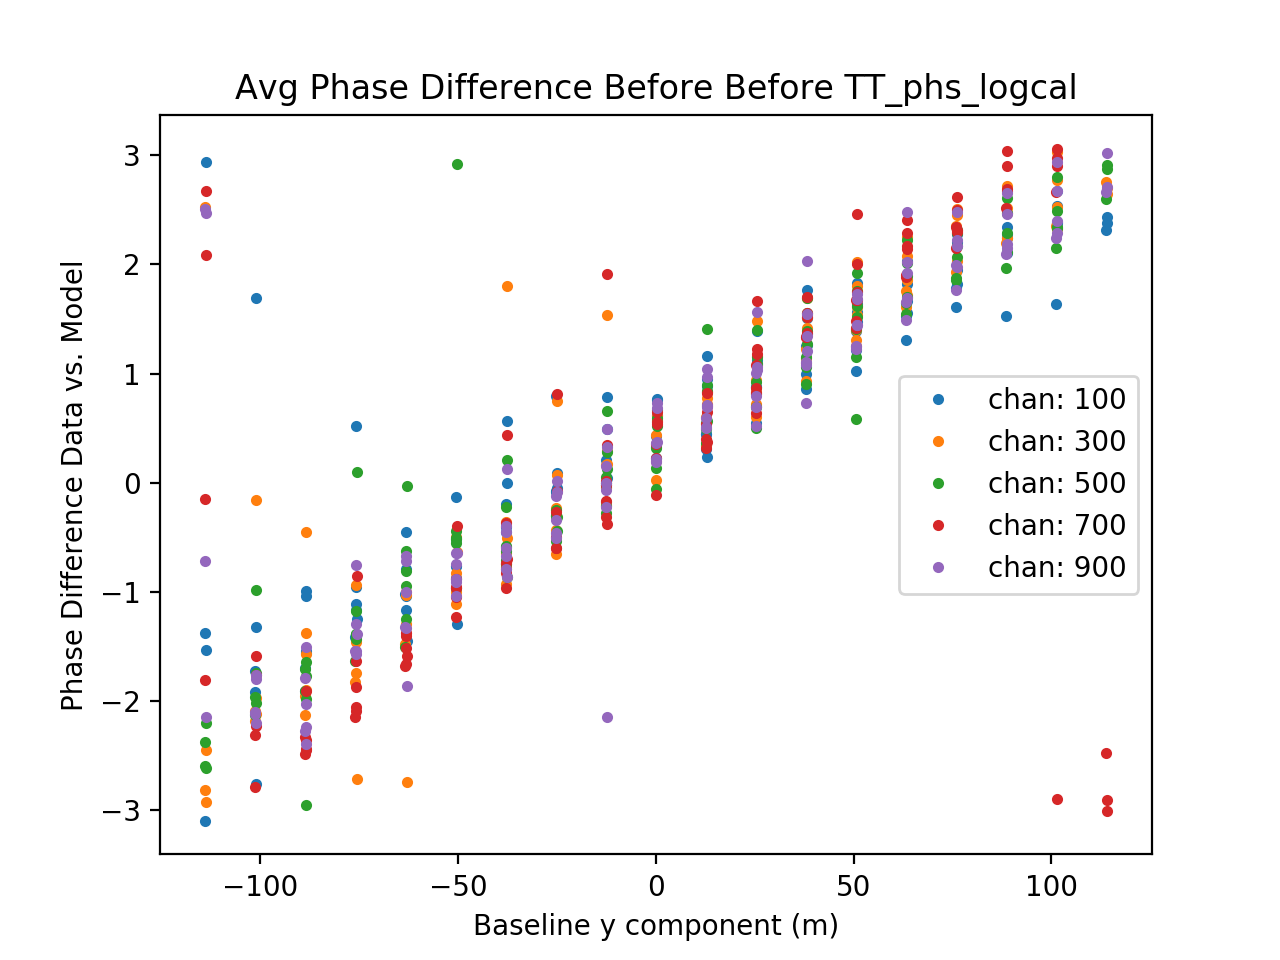

divide by zero encountered in divide


In [13]:
plt.figure()
for chan in [100,300,500,700,900]:
    plt.plot(blvecs[:,1], np.angle(np.mean(avg_noTT_abs_data[:,:,chan] / avg_model[:,:,chan],axis=1)),
             '.', label='chan: '+str(chan))
plt.legend()
plt.xlabel('Baseline y component (m)')
plt.ylabel('Phase Difference Data vs. Model')
plt.title('Avg Phase Difference Before Before TT_phs_logcal')


# Fit frequency-independent phase slope

In [14]:
#data = deepcopy(noTT_abs_data)
data = deepcopy(noTT_AC.data)
model = new_model
flags = omni_data_flags

In [15]:
for k in data.keys():
    data[k][flags[k]] = np.nan # maybe also put in flags from model

In [16]:
flagged_bls = [bl for bl in omni_data_flags.keys() if np.all(omni_data_flags[bl])]
reds = hc.redcal.get_reds(data_antpos, pols=['xx'])
reds = [[bl for bl in red if (bl not in flagged_bls and 
                              (bl[1],bl[0],bl[2][::-1]) not in flagged_bls)] for red in reds]
reds = [red for red in reds if len(red) > 0]
wgts = [len(red) for red in reds]
blvecs = np.array([data_antpos[red[0][1]] - data_antpos[red[0][0]] for red in reds if red[0][2] == 'xx'])

In [17]:
def bl_avg_data(data, reds, pol):
    avg_data = []
    for red in reds:
        if red[0][2] == pol:
            avg_data.append(np.nanmean([data[bl] for bl in red], axis=0))
            if np.all(~np.isfinite(avg_data[-1])):
                print red
    return np.array(avg_data)

In [18]:
blavg_model = bl_avg_data(model, reds, 'xx')
blavg_data = bl_avg_data(data, reds, 'xx')

<IPython.core.display.Javascript object>


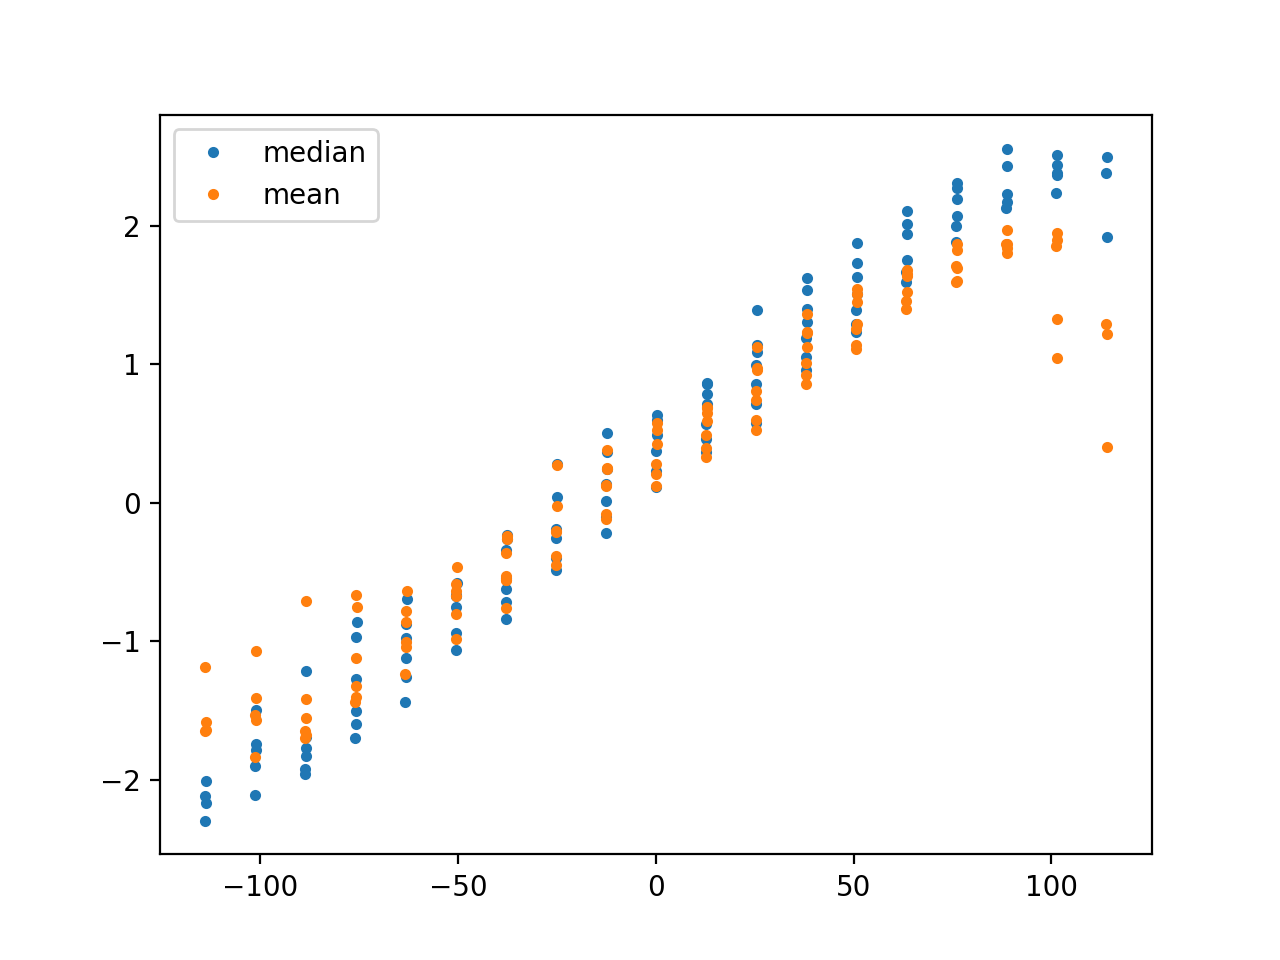

In [19]:
plt.figure()
plt.plot(blvecs[:,1],np.nanmedian(np.angle(blavg_data / blavg_model), axis=2)[:,0],'.', label='median')
plt.plot(blvecs[:,1],np.nanmean(np.angle(blavg_data / blavg_model), axis=2)[:,0],'.', label='mean')
plt.legend()

In [20]:
ls_data, ls_wgts = {}, {}
for i,vec in enumerate(blvecs):
    eqn_str = '{}*Phi_x + {}*Phi_y'.format(vec[0],vec[1])
    ls_data[eqn_str] = np.nanmedian(np.angle(blavg_data[i,:,:] / blavg_model[i,:,:]), axis=1) 
    ls_wgts[eqn_str] = np.ones_like(ls_data[eqn_str]) * wgts[i]

In [21]:
solver = linsolve.LinearSolver(ls_data, wgts=ls_wgts)
sol = solver.solve()

In [22]:
print sol

{'Phi_y': array([ 0.0234389 ,  0.0233403 ,  0.02349344,  0.02323837,  0.02347742,
        0.02306714,  0.0231624 ,  0.02301057,  0.02302712,  0.02299905,
        0.02310942,  0.02291253,  0.02311601,  0.02295548,  0.02320807,
        0.02301116,  0.02295606,  0.02273327,  0.02262489,  0.02278782,
        0.0226147 ,  0.02286097,  0.02277079,  0.0227503 ,  0.02275969,
        0.02297791,  0.02297841,  0.02278146,  0.02267317,  0.02275855,
        0.02277753,  0.02261488,  0.02221967,  0.0226806 ,  0.02266803,
        0.0224756 ,  0.02271292,  0.02246808,  0.02229356,  0.02193932,
        0.02187274,  0.02215024,  0.02186953,  0.02209877,  0.02216511,
        0.02195105,  0.02172101,  0.02159362,  0.02207001,  0.02158215,
        0.02181116,  0.021864  ,  0.02171425,  0.02164841,  0.02164598,
        0.02166494,  0.02176915,  0.02155078,  0.02141016,  0.02129234]), 'Phi_x': array([ 0.00798174,  0.0080401 ,  0.00803413,  0.00804299,  0.00804438,
        0.00811905,  0.00807678,  0.0079911

<IPython.core.display.Javascript object>


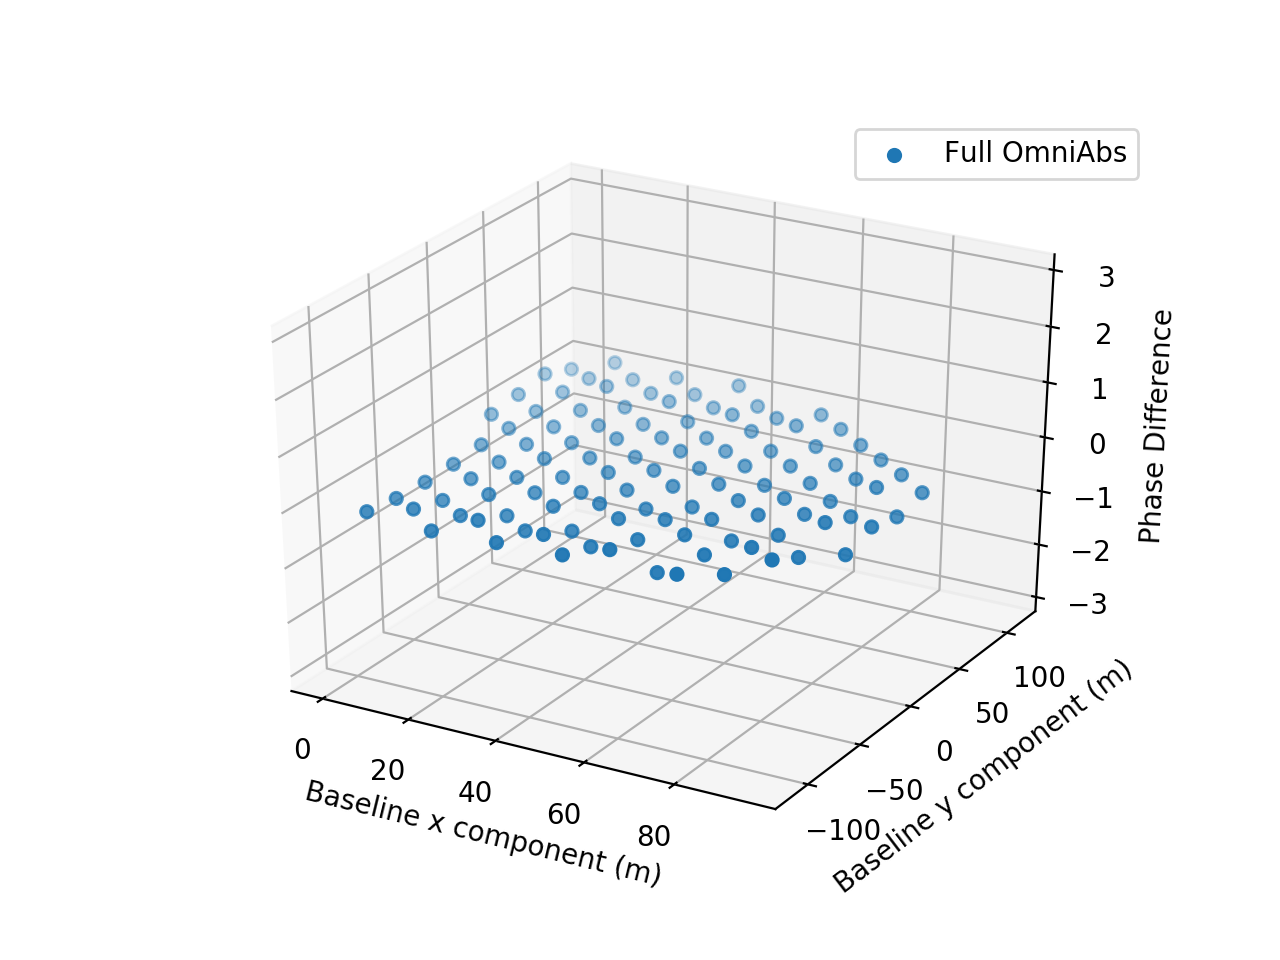

(-3.141592653589793, 3.141592653589793)

In [23]:
new_blavg_data = deepcopy(blavg_data)
for i,vec in enumerate(blvecs):
    new_blavg_data[i,:,:] *= np.exp(-1.0j*(sol['Phi_x']*vec[0] + sol['Phi_y']*vec[1]))[:,np.newaxis]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(blvecs[:,0], blvecs[:,1],np.nanmedian(np.angle(new_blavg_data / blavg_model), axis=2)[:,0], label='Full OmniAbs')

plt.legend()
ax.set_xlabel('Baseline x component (m)')
ax.set_ylabel('Baseline y component (m)')
ax.set_zlabel('Phase Difference')
ax.set_zlim([-np.pi, np.pi])


# Try TT_phs after $\nu$-independent phase slope

In [24]:
# get data ants
total_data_antpos = copy.deepcopy(data_antpos)
data_ants = np.unique(map(lambda k: k[:2], data.keys()))
data_antpos = odict(map(lambda k: (k, data_antpos[k]), data_ants))

# get wgts
wgts = DataContainer(odict(map(lambda k: (k, (~omni_data_flags[k]).astype(np.float)), omni_data_flags.keys())))

In [25]:
global_phase_slope_gains = {ant: np.outer(np.exp(-1.0j*(sol['Phi_x']*total_data_antpos[ant[0]][0] + 
                               sol['Phi_y']*total_data_antpos[ant[0]][1])), np.ones(len(data_freqs))) 
                               for ant in standard_gains.keys()}

In [26]:
gain_list = [noTT_gains]
AC = deepcopy(noTT_AC)
cal_flags = odict(map(lambda k: (k, np.zeros_like(global_phase_slope_gains[k], np.bool)), 
                      global_phase_slope_gains.keys()))
apply_cal.recalibrate_in_place(AC.data, AC.wgts, global_phase_slope_gains, cal_flags, gain_convention='divide')
gain_list.append(global_phase_slope_gains)

<IPython.core.display.Javascript object>


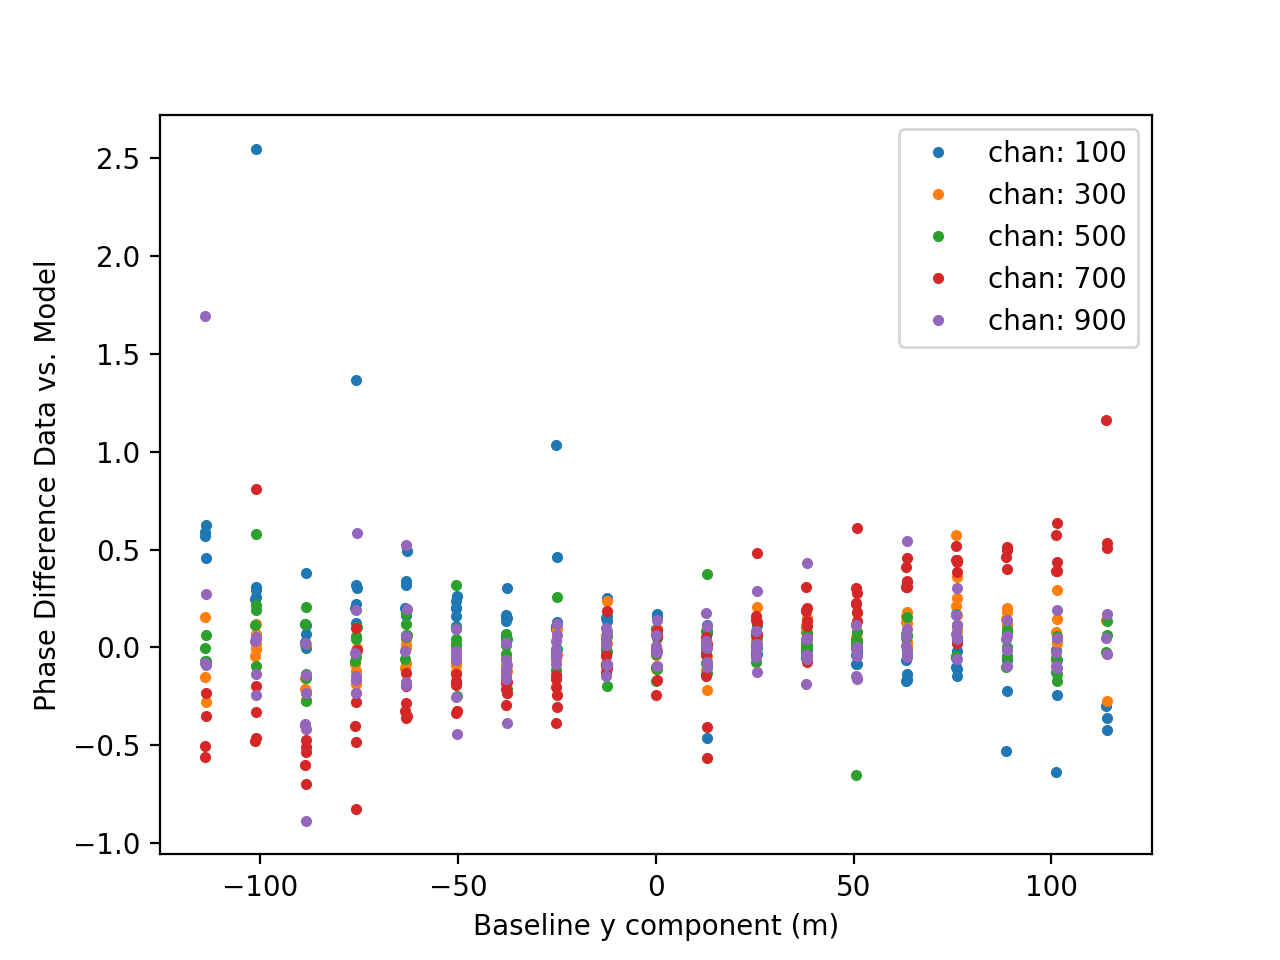

divide by zero encountered in divide


In [27]:
flagged_bls = [bl for bl in omni_data_flags.keys() if np.all(omni_data_flags[bl])]
reds = hc.redcal.get_reds(data_antpos, pols=['xx'])
reds = [[bl for bl in red if bl not in flagged_bls] for red in reds]
reds = [red for red in reds if len(red) > 0]
blvecs = np.array([data_antpos[red[0][1]] - data_antpos[red[0][0]] for red in reds if red[0][2] == 'xx'])

def bl_avg_data(data, reds, pol):
    avg_data = []
    for red in reds:
        if red[0][2] == pol:
            avg_data.append(np.mean([data[bl] for bl in red], axis=0))
    return np.array(avg_data)

avg_model = bl_avg_data(new_model, reds, 'xx')
avg_post_global_phase = bl_avg_data(AC.data, reds, 'xx')
plt.figure()
for chan in [100,300,500,700,900]:
    plt.plot(blvecs[:,1], np.angle(np.mean(avg_post_global_phase[:,:,chan] / avg_model[:,:,chan],axis=1)),
             '.', label='chan: '+str(chan))
plt.legend()
plt.xlabel('Baseline y component (m)')
plt.ylabel('Phase Difference Data vs. Model')
#plt.title('Avg Phase Difference Before Before TT_phs_logcal')


In [28]:
AC.TT_phs_logcal(verbose=True)
cal_flags = odict(map(lambda k: (k, np.zeros_like(AC.TT_Phi_gain[k], np.bool)), AC.TT_Phi_gain.keys()))
apply_cal.recalibrate_in_place(AC.data, AC.wgts, AC.TT_Phi_gain, cal_flags, gain_convention='divide')

...configuring linsolve data for TT_phs_logcal
...running linsolve
...finished linsolve


In [29]:
total_gain_keys = flatten(map(lambda p: map(lambda k: (k, p), total_data_antpos.keys()), AC.gain_pols))
gain_list.append(AC.custom_TT_Phi_gain(total_gain_keys, total_data_antpos))
gain_list.append(AC.custom_abs_psi_gain(total_gain_keys))

<IPython.core.display.Javascript object>


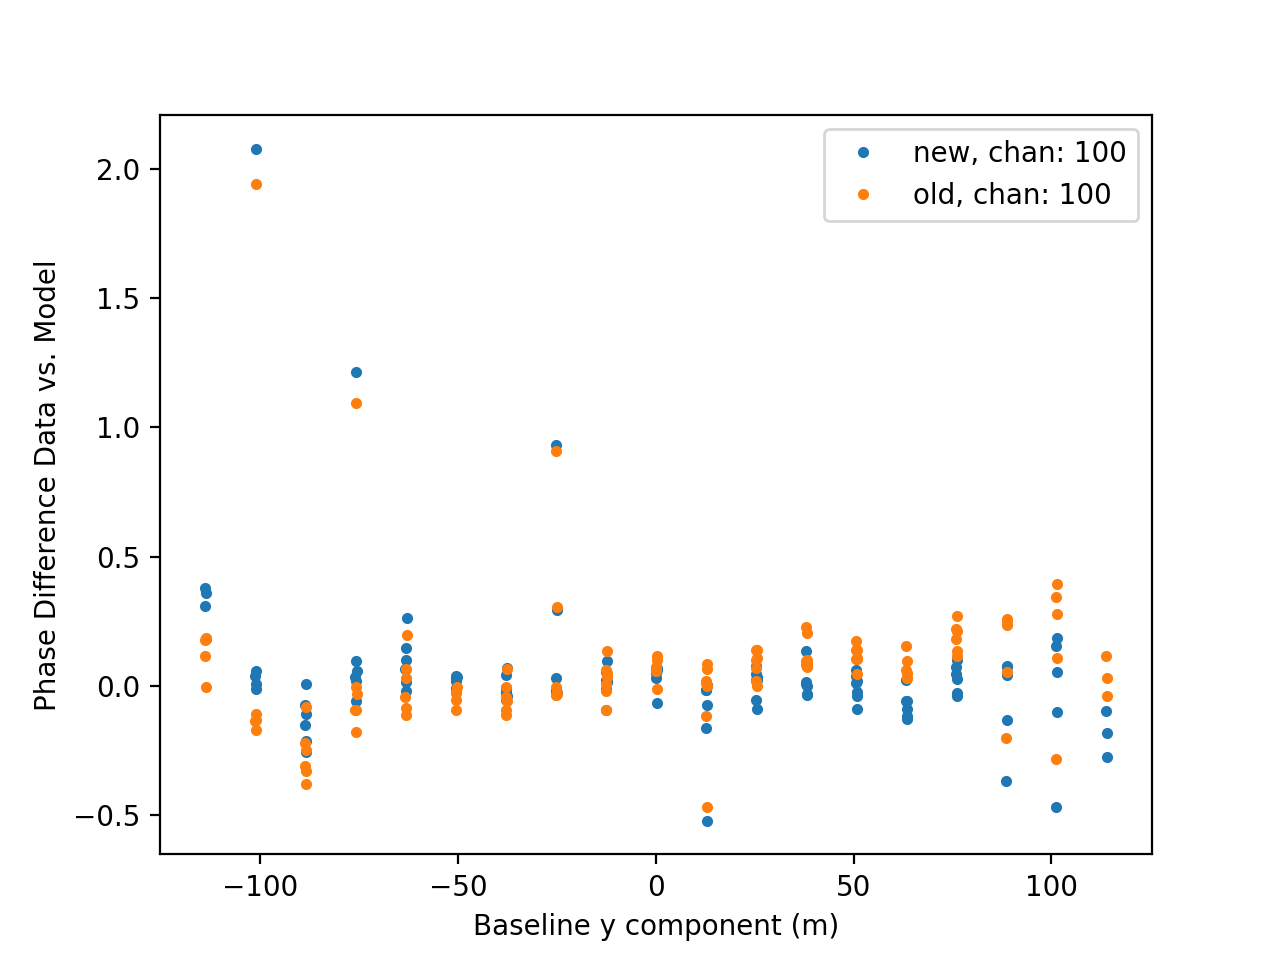

divide by zero encountered in divide
divide by zero encountered in divide


<IPython.core.display.Javascript object>


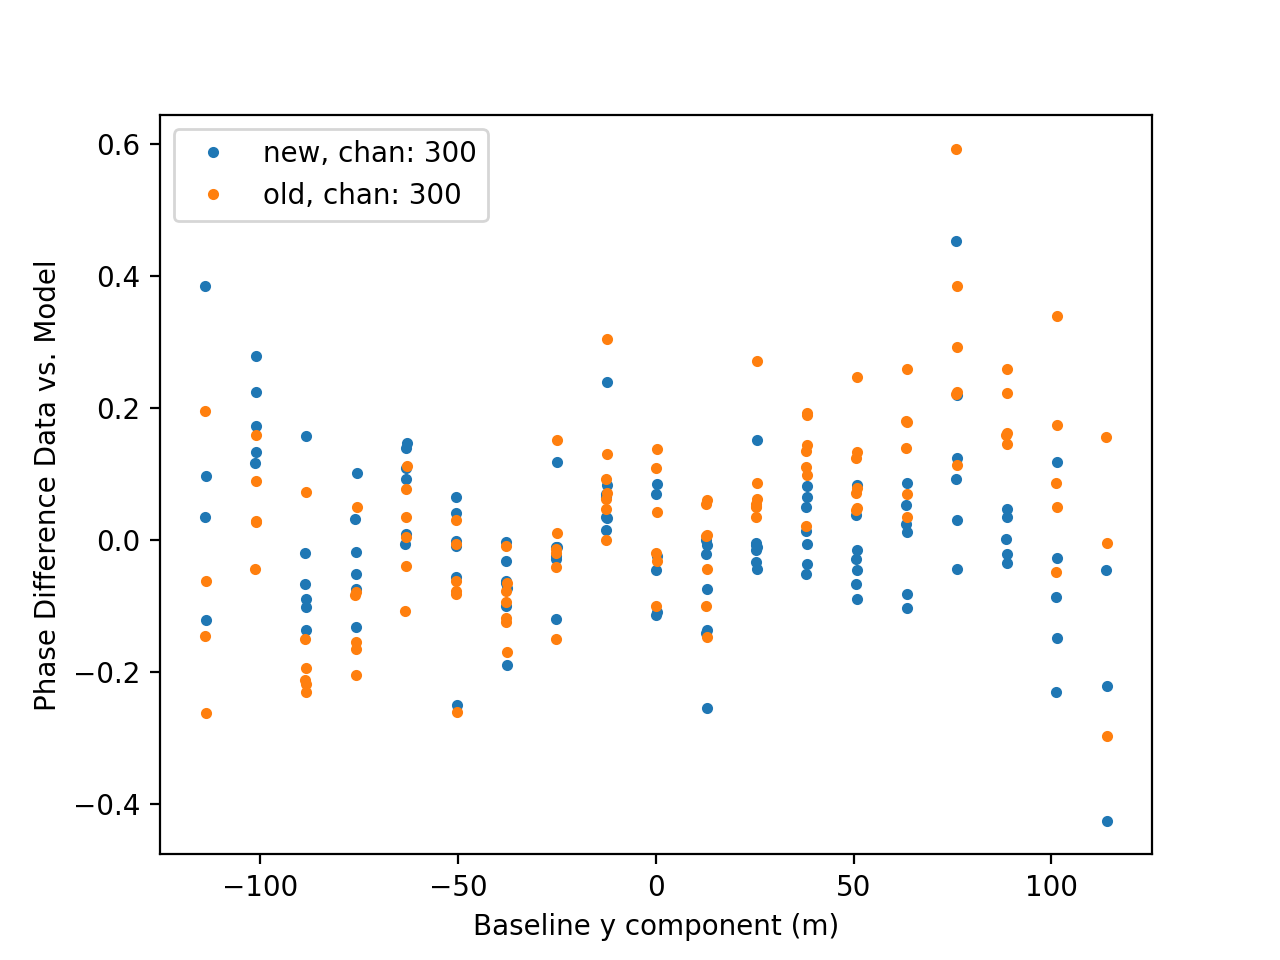

<IPython.core.display.Javascript object>


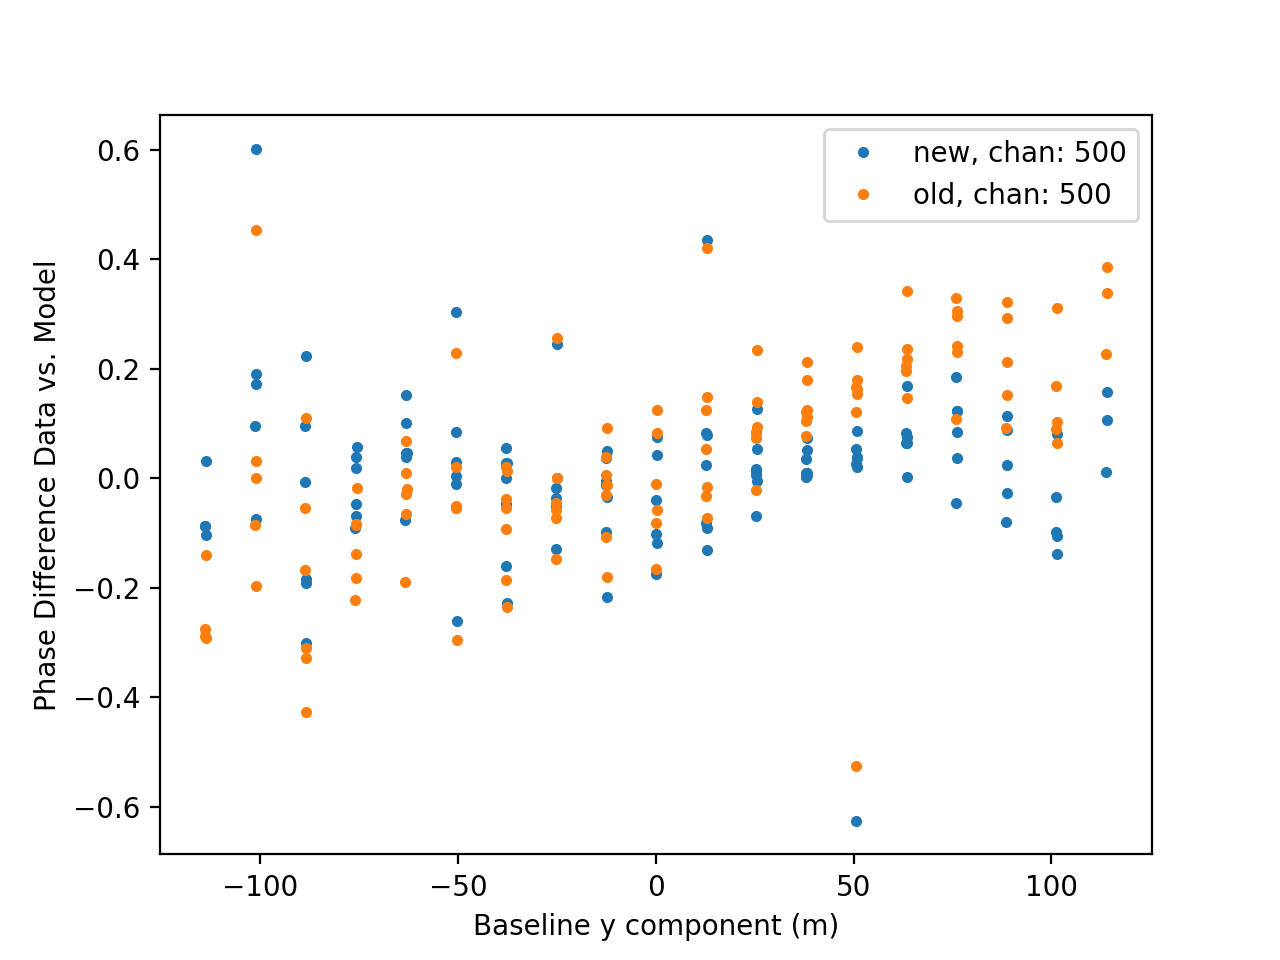

<IPython.core.display.Javascript object>


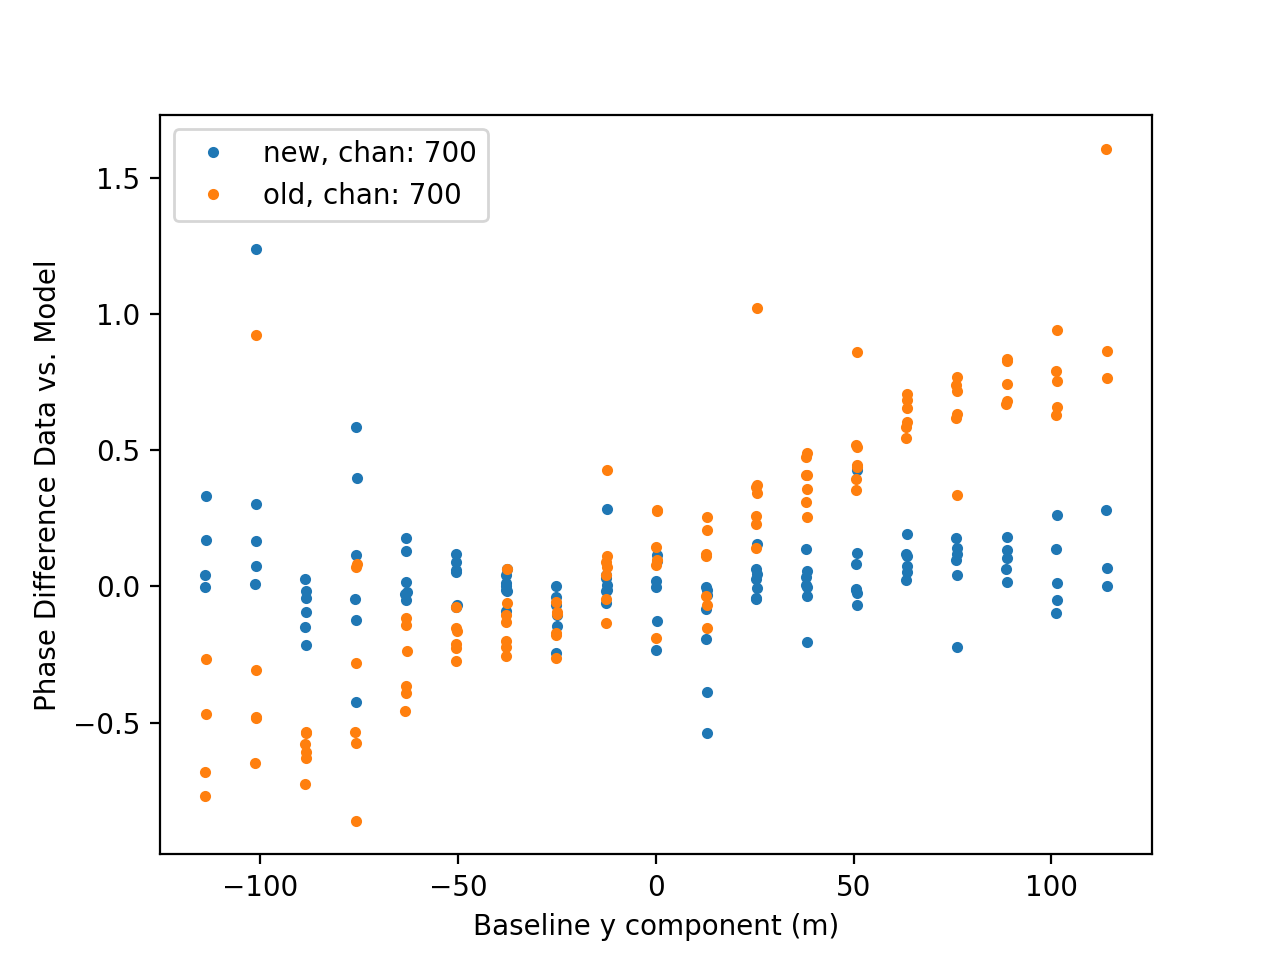

<IPython.core.display.Javascript object>


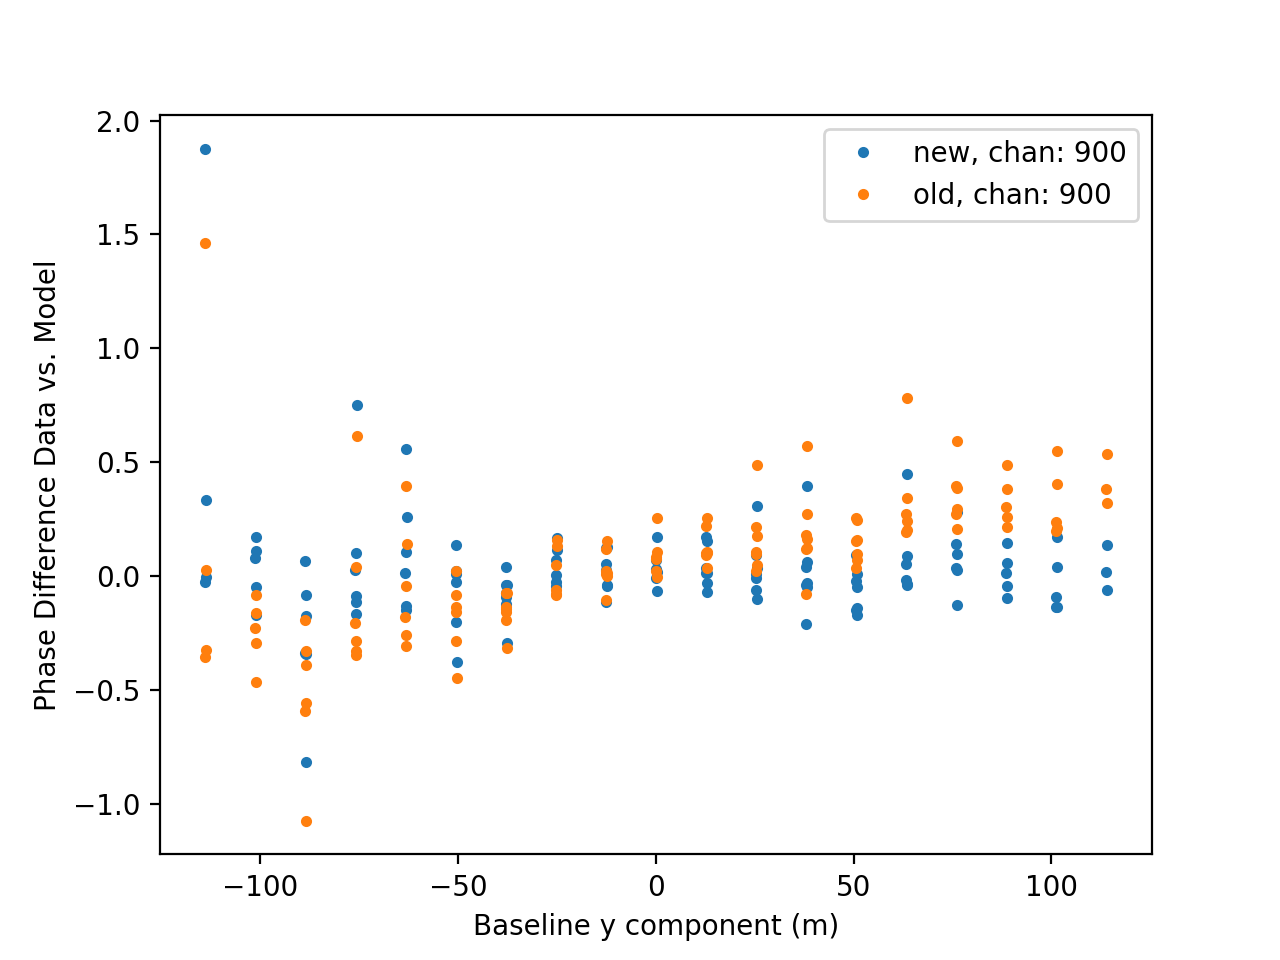

In [30]:
flagged_bls = [bl for bl in omni_data_flags.keys() if np.all(omni_data_flags[bl])]
reds = hc.redcal.get_reds(data_antpos, pols=['xx'])
reds = [[bl for bl in red if bl not in flagged_bls] for red in reds]
reds = [red for red in reds if len(red) > 0]
blvecs = np.array([data_antpos[red[0][1]] - data_antpos[red[0][0]] for red in reds if red[0][2] == 'xx'])

def bl_avg_data(data, reds, pol):
    avg_data = []
    for red in reds:
        if red[0][2] == pol:
            avg_data.append(np.mean([data[bl] for bl in red], axis=0))
    return np.array(avg_data)

avg_model = bl_avg_data(new_model, reds, 'xx')
avg_post_global_phase = bl_avg_data(AC.data, reds, 'xx')
avg_standard = bl_avg_data(standard_AC.data, reds, 'xx')

for chan in [100,300,500,700,900]:
    plt.figure()
    plt.plot(blvecs[:,1], np.angle(np.mean(avg_post_global_phase[:,:,chan] / avg_model[:,:,chan],axis=1)),
             '.', label='new, chan: '+str(chan))
    plt.plot(blvecs[:,1], np.angle(np.mean(avg_standard[:,:,chan] / avg_model[:,:,chan],axis=1)),
             '.', label='old, chan: '+str(chan))

    plt.legend()
    plt.xlabel('Baseline y component (m)')
    plt.ylabel('Phase Difference Data vs. Model')
#plt.title('Avg Phase Difference Before Before TT_phs_logcal')


In [31]:
AC = deepcopy(noTT_AC)

In [32]:
iter_1 = deepcopy(AC.data)

In [33]:
AC.TT_phs_logcal(verbose=True)
cal_flags = odict(map(lambda k: (k, np.zeros_like(AC.TT_Phi_gain[k], np.bool)), AC.TT_Phi_gain.keys()))
apply_cal.recalibrate_in_place(AC.data, AC.wgts, AC.TT_Phi_gain, cal_flags, gain_convention='divide')

total_gain_keys = flatten(map(lambda p: map(lambda k: (k, p), total_data_antpos.keys()), AC.gain_pols))
gain_list.append(AC.custom_TT_Phi_gain(total_gain_keys, total_data_antpos))
gain_list.append(AC.custom_abs_psi_gain(total_gain_keys))

...configuring linsolve data for TT_phs_logcal
...running linsolve
...finished linsolve


In [34]:
iter_2 = deepcopy(AC.data)

In [35]:
AC.TT_phs_logcal(verbose=True)
cal_flags = odict(map(lambda k: (k, np.zeros_like(AC.TT_Phi_gain[k], np.bool)), AC.TT_Phi_gain.keys()))
apply_cal.recalibrate_in_place(AC.data, AC.wgts, AC.TT_Phi_gain, cal_flags, gain_convention='divide')

total_gain_keys = flatten(map(lambda p: map(lambda k: (k, p), total_data_antpos.keys()), AC.gain_pols))
gain_list.append(AC.custom_TT_Phi_gain(total_gain_keys, total_data_antpos))
gain_list.append(AC.custom_abs_psi_gain(total_gain_keys))

...configuring linsolve data for TT_phs_logcal
...running linsolve
...finished linsolve


In [36]:
iter_3 = deepcopy(AC.data)

In [37]:
AC.TT_phs_logcal(verbose=True)
cal_flags = odict(map(lambda k: (k, np.zeros_like(AC.TT_Phi_gain[k], np.bool)), AC.TT_Phi_gain.keys()))
apply_cal.recalibrate_in_place(AC.data, AC.wgts, AC.TT_Phi_gain, cal_flags, gain_convention='divide')

total_gain_keys = flatten(map(lambda p: map(lambda k: (k, p), total_data_antpos.keys()), AC.gain_pols))
gain_list.append(AC.custom_TT_Phi_gain(total_gain_keys, total_data_antpos))
gain_list.append(AC.custom_abs_psi_gain(total_gain_keys))

...configuring linsolve data for TT_phs_logcal
...running linsolve
...finished linsolve


In [38]:
iter_4 = deepcopy(AC.data)

<IPython.core.display.Javascript object>


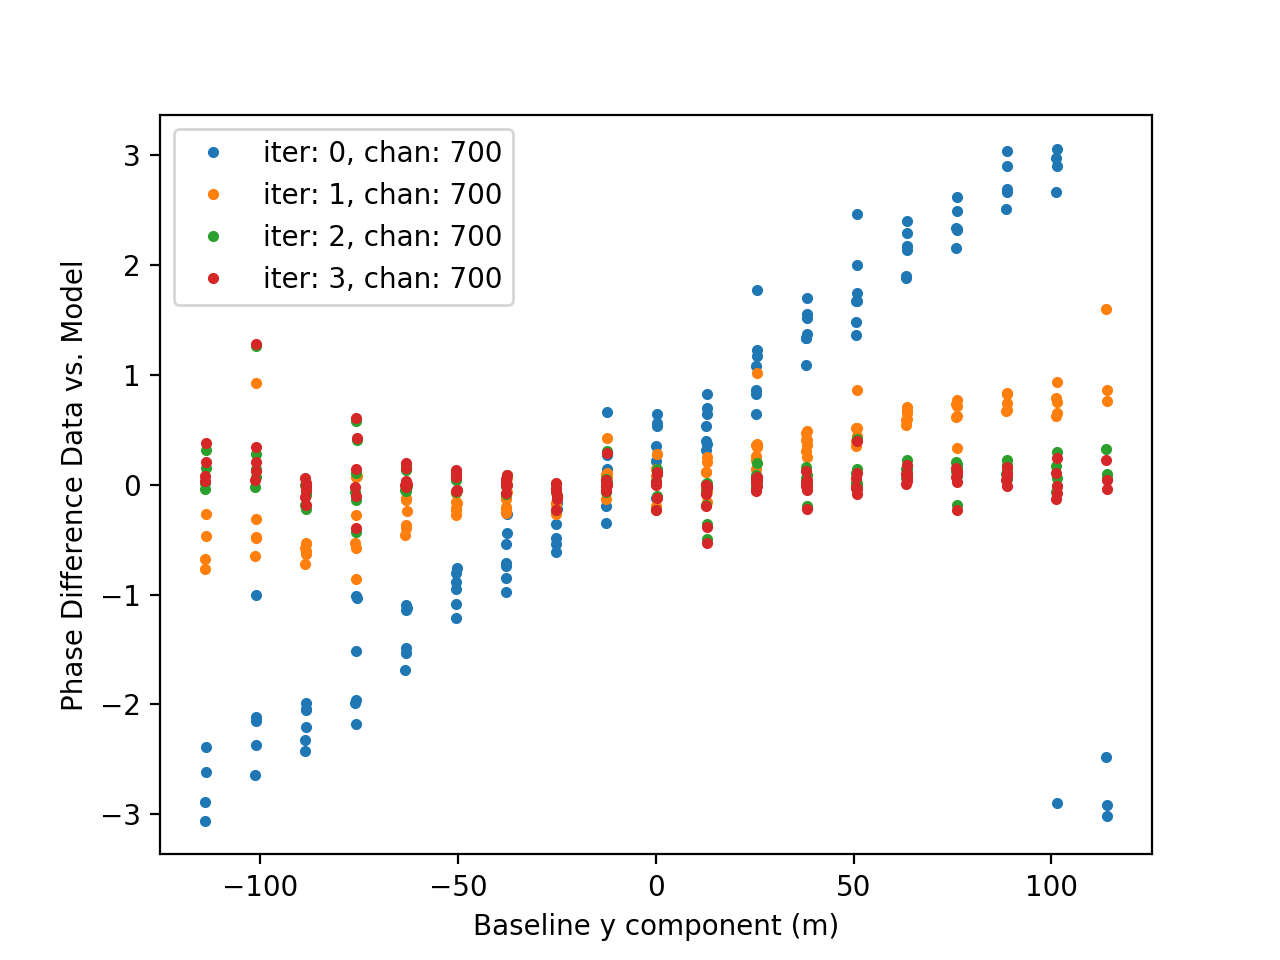

divide by zero encountered in divide


In [39]:
flagged_bls = [bl for bl in omni_data_flags.keys() if np.all(omni_data_flags[bl])]
reds = hc.redcal.get_reds(data_antpos, pols=['xx'])
reds = [[bl for bl in red if bl not in flagged_bls] for red in reds]
reds = [red for red in reds if len(red) > 0]
blvecs = np.array([data_antpos[red[0][1]] - data_antpos[red[0][0]] for red in reds if red[0][2] == 'xx'])

plt.figure()
for chan in [700]:#[100,300,500,700,900]:
    for i,it in enumerate([iter_1, iter_2, iter_3, iter_4]):

        plt.plot(blvecs[:,1], np.angle(np.mean(bl_avg_data(it, reds, 'xx')[:,:,chan] / avg_model[:,:,chan],axis=1)),
                 '.', label='iter: ' + str(i) + ', chan: ' +str(chan))

        plt.legend()
        plt.xlabel('Baseline y component (m)')
        plt.ylabel('Phase Difference Data vs. Model')


# build global_phase_slope_logcal

In [40]:
from hera_cal import redcal
#global_phase_slope_logcal(model, data, antpos, wgts=None, verbose=True, tol=1.0):
data = deepcopy(noTT_AC.data)
model = deepcopy(new_model)
wgts = DataContainer(odict(map(lambda k: (k, (~omni_data_flags[k]).astype(np.float)), omni_data_flags.keys())))
antpos = deepcopy(total_data_antpos)
verbose = True
tol = 1.0

In [41]:
# get keys from model dictionary
keys = sorted(set(model.keys()) & set(data.keys()))
ants = np.unique(antpos.keys())

# make weights if None and make flags
if wgts is None:
    wgts = odict()
    for i, k in enumerate(keys):
        wgts[k] = np.ones_like(ydata[k], dtype=np.float)
flags = DataContainer({k: wgts[k]==0 for k in keys})

# average data over baselines
reds = redcal.get_reds(antpos, bl_error_tol=tol, pols=data.pols(), low_hi=True)
avg_data, avg_flags, red_keys = avg_data_across_red_bls(DataContainer({k: data[k] for k in keys}), 
                                                        antpos, flags=flags, broadcast_flags=False, 
                                                        tol=tol, reds=reds)
avg_model, _, _ = avg_data_across_red_bls(DataContainer({k: model[k] for k in keys}), 
                                          antpos, flags=flags, broadcast_flags = False, 
                                          tol=tol, reds=reds)
ls_data, ls_wgts = {}, {}
for rk in red_keys:
    # build equation string 
    eqn_str = '{}*Phi_ew_{} + {}*Phi_ns_{} - {}*Phi_ew_{} - {}*Phi_ns_{}'
    eqn_str = eqn_str.format(antpos[rk[0]][0], rk[2][0], antpos[rk[0]][1], rk[2][0],
                             antpos[rk[1]][0], rk[2][1], antpos[rk[1]][1], rk[2][1])

    # calculated frequency median of unflagged angle(data/model)
    delta_phi = np.angle(avg_data[rk] / avg_model[rk])
    delta_phi[avg_flags[rk]] = np.nan
    ls_data[eqn_str] = np.nanmedian(delta_phi, axis=1)

    # set weights based on redundancy of unflagged channels
    for red in reds:
        if rk in red or (rk[1],rk[0],rk[2][::-1]) in red:
            ls_wgts[eqn_str] = np.sum([~flags[bl] for bl in red], axis=(0,2))

    # set unobserved data to 0 with 0 weight
    ls_wgts[eqn_str][np.isnan(ls_data[eqn_str])] = 0
    ls_data[eqn_str][np.isnan(ls_data[eqn_str])] = 0
        
solver = linsolve.LinearSolver(ls_data, wgts=ls_wgts)
fit = solver.solve()
print fit

divide by zero encountered in divide
invalid value encountered in divide
All-NaN slice encountered


{'Phi_ns_x': array([-0.02342023, -0.02332219, -0.02348625, -0.02322439, -0.0234496 ,
       -0.02306539, -0.02315807, -0.02299847, -0.02299813, -0.02297203,
       -0.02308948, -0.02288042, -0.0231024 , -0.02293942, -0.02317688,
       -0.02299588, -0.02294742, -0.02271364, -0.02260371, -0.02276237,
       -0.02260345, -0.02284212, -0.02274809, -0.02272901, -0.02272444,
       -0.02295687, -0.02294358, -0.02274265, -0.02262859, -0.02273214,
       -0.02276856, -0.02258323, -0.02219603, -0.02265244, -0.02263525,
       -0.02244648, -0.02267447, -0.02242658, -0.02226579, -0.02190849,
       -0.02183186, -0.02210892, -0.02183555, -0.02206072, -0.02211927,
       -0.02190962, -0.02167931, -0.02154339, -0.02203258, -0.02153509,
       -0.02176006, -0.02182988, -0.02167119, -0.0216018 , -0.02160096,
       -0.02163133, -0.02173217, -0.02151256, -0.0213671 , -0.02124986]), 'Phi_ew_x': array([-0.00800426, -0.0080651 , -0.00804264, -0.00805947, -0.00806271,
       -0.00813442, -0.00808828, -0.0